<a href="https://colab.research.google.com/github/OmdenaAI/SanJoseUSAChapter_ChronicDiseaseRisk/blob/Dietary_data/Dietary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dietary data feature engineering


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading and exploring the data
dietary_data = pd.read_csv('/content/Merged_Dietary_Data.csv')

In [ ]:
dietary_data.head()

SEQN      DSDCOUNT      DSDANCNT  DSD010  DSD010AN  DSQTKCAL  DSQTPROT  \
0  109263.0  2.000000e+00  5.397605e-79     1.0       2.0      18.0       NaN   
1  109264.0  5.397605e-79  5.397605e-79     2.0       2.0       NaN       NaN   
2  109265.0  5.397605e-79  5.397605e-79     2.0       2.0       NaN       NaN   
3  109266.0  5.397605e-79  5.397605e-79     2.0       2.0       NaN       NaN   
4  109267.0  1.000000e+00  5.397605e-79     1.0       2.0       NaN       NaN   

   DSQTCARB  DSQTSUGR  DSQTFIBE  ...      DR2TP184  DR2TP204  DR2TP205  \
0       3.5       3.0       NaN  ...  5.397605e-79     0.035     0.002   
1       NaN       NaN       NaN  ...  5.397605e-79     0.085     0.005   
2       NaN       NaN       NaN  ...  5.397605e-79     0.070     0.002   
3       NaN       NaN       NaN  ...  5.397605e-79     0.028     0.006   
4       NaN       NaN       NaN  ...           NaN       NaN       NaN   

   DR2TP225      DR2TP226  DR2_300  DR2_320Z  DR2_330Z      DR2BWATZ  DR2TWSZ  
0     0.006  5.397605e-79      2.0     300.0     300.0  5.397605e-79      1.0  
1     0.004  3.000000e-03      2.0    1080.0    1080.0  5.397605e-79      1.0  
2     0.014  7.000000e-03      2.0     480.0     480.0  5.397605e-79     91.0  
3     0.013  2.000000e-03      2.0    4057.8    4057.8  5.397605e-79      1.0  
4       NaN           NaN      NaN       NaN       NaN           NaN      NaN  

[5 rows x 386 columns]

In [ ]:
#Info and describe
dietary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Columns: 386 entries, SEQN to DR2TWSZ
dtypes: float64(386)
memory usage: 45.8 MB


In [ ]:
dietary_data.describe()

SEQN      DSDCOUNT      DSDANCNT        DSD010      DSD010AN  \
count   15560.00000  1.556000e+04  1.556000e+04  15560.000000  15560.000000   
mean   117042.50000  1.047429e+00  1.308483e-01      1.552249      1.907712   
std      4491.92943  3.007724e+00  1.765652e+00      0.531151      0.316794   
min    109263.00000  5.397605e-79  5.397605e-79      1.000000      1.000000   
25%    113152.75000  5.397605e-79  5.397605e-79      1.000000      2.000000   
50%    117042.50000  5.397605e-79  5.397605e-79      2.000000      2.000000   
75%    120932.25000  1.000000e+00  5.397605e-79      2.000000      2.000000   
max    124822.00000  9.900000e+01  9.900000e+01      9.000000      9.000000   

          DSQTKCAL    DSQTPROT     DSQTCARB     DSQTSUGR    DSQTFIBE  ...  \
count  3198.000000  380.000000  2686.000000  1820.000000  296.000000  ...   
mean     15.326954    2.926621     2.591289     1.928374    2.592047  ...   
std      35.193193    8.452823     6.574693     2.199758    3.783173  ...   
min       0.100000    0.002000     0.000500     0.020000    0.003000  ...   
25%       5.000000    0.332250     0.700000     0.700000    0.500000  ...   
50%      10.000000    0.500000     1.500000     1.500000    1.210000  ...   
75%      15.000000    1.000000     3.000000     2.670000    3.000000  ...   
max    1270.000000   67.000000   254.500000    24.000000   26.000000  ...   

           DR2TP184      DR2TP204      DR2TP205      DR2TP225      DR2TP226  \
count  1.062700e+04  1.062700e+04  1.062700e+04  1.062700e+04  1.062700e+04   
mean   8.260469e-03  1.311830e-01  3.078649e-02  2.495624e-02  5.590694e-02   
std    3.350753e-02  1.166068e-01  1.365844e-01  5.656151e-02  2.094299e-01   
min    5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
25%    5.397605e-79  5.200000e-02  3.000000e-03  7.000000e-03  1.000000e-03   
50%    1.000000e-03  1.000000e-01  7.000000e-03  1.500000e-02  6.000000e-03   
75%    3.000000e-03  1.750000e-01  1.300000e-02  2.600000e-02  3.200000e-02   
max    1.258000e+00  1.388000e+00  4.263000e+00  1.380000e+00  6.934000e+00   

            DR2_300      DR2_320Z      DR2_330Z      DR2BWATZ       DR2TWSZ  
count  10936.000000  1.083000e+04  1.083000e+04  1.083000e+04  10936.000000  
mean       2.120794  8.729474e+02  4.195442e+02  4.534032e+02     13.149049  
std        0.661671  9.815088e+02  8.250357e+02  7.728286e+02     30.168524  
min        1.000000  5.397605e-79  5.397605e-79  5.397605e-79      1.000000  
25%        2.000000  1.950000e+02  5.397605e-79  5.397605e-79      1.000000  
50%        2.000000  5.700000e+02  5.397605e-79  5.397605e-79      1.000000  
75%        2.000000  1.200000e+03  5.100000e+02  6.000000e+02      4.000000  
max        9.000000  1.216800e+04  1.183500e+04  1.216800e+04     99.000000  

[8 rows x 386 columns]

In [ ]:
#finding mising data and the precentage
dietary_data.isnull().sum()

SEQN           0
DSDCOUNT       0
DSDANCNT       0
DSD010         0
DSD010AN       0
            ... 
DR2_300     4624
DR2_320Z    4730
DR2_330Z    4730
DR2BWATZ    4730
DR2TWSZ     4624
Length: 386, dtype: int64

In [ ]:
missing_perc = dietary_data.isnull().sum()/len(dietary_data)*100
missing_perc

SEQN         0.000000
DSDCOUNT     0.000000
DSDANCNT     0.000000
DSD010       0.000000
DSD010AN     0.000000
              ...    
DR2_300     29.717224
DR2_320Z    30.398458
DR2_330Z    30.398458
DR2BWATZ    30.398458
DR2TWSZ     29.717224
Length: 386, dtype: float64

In [ ]:
#taking the cholesterol variable and sugar for Exloring furthure and for missing value
dietary_data_chol_sugar = ['DR1TSUGR','DR1TTFAT','DR1TSFAT','DR1TMFAT','DR1TPFAT','DR1TCHOL','DR2TSUGR','DR2TTFAT','DR2TSFAT','DR2TMFAT','DR2TPFAT','DR2TCHOL']
dietary_data_chol_sugar = dietary_data[dietary_data_chol_sugar]
dietary_data_chol_sugar.head()

DR1TSUGR  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  DR2TSUGR  \
0     73.42     48.82    18.660    15.420     9.510      71.0     82.92   
1     27.86     37.63     7.861    13.896    12.426     153.0     89.08   
2    157.08     80.63    33.562    28.231    12.957     123.0    125.10   
3     94.20     73.81    22.175    25.513    19.171     120.0     65.71   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   DR2TTFAT  DR2TSFAT  DR2TMFAT  DR2TPFAT  DR2TCHOL  
0     23.45     8.260     7.249     3.566      80.0  
1     74.10    26.379    25.406    13.471     202.0  
2     66.61    25.357    17.425    16.315     140.0  
3     61.01    22.132    19.997    12.793      92.0  
4       NaN       NaN       NaN       NaN       NaN

In [ ]:
#lets find the missing values here as well and fill it with mean and median
dietary_data_chol_sugar.isnull().sum()

DR1TSUGR    3168
DR1TTFAT    3168
DR1TSFAT    3168
DR1TMFAT    3168
DR1TPFAT    3168
DR1TCHOL    3168
DR2TSUGR    4933
DR2TTFAT    4933
DR2TSFAT    4933
DR2TMFAT    4933
DR2TPFAT    4933
DR2TCHOL    4933
dtype: int64

In [ ]:
dietary_data_chol_sugar_fillna_mean = dietary_data_chol_sugar.fillna(dietary_data_chol_sugar.mean())
dietary_data_chol_sugar_fillna_median = dietary_data_chol_sugar.fillna(dietary_data_chol_sugar.median())

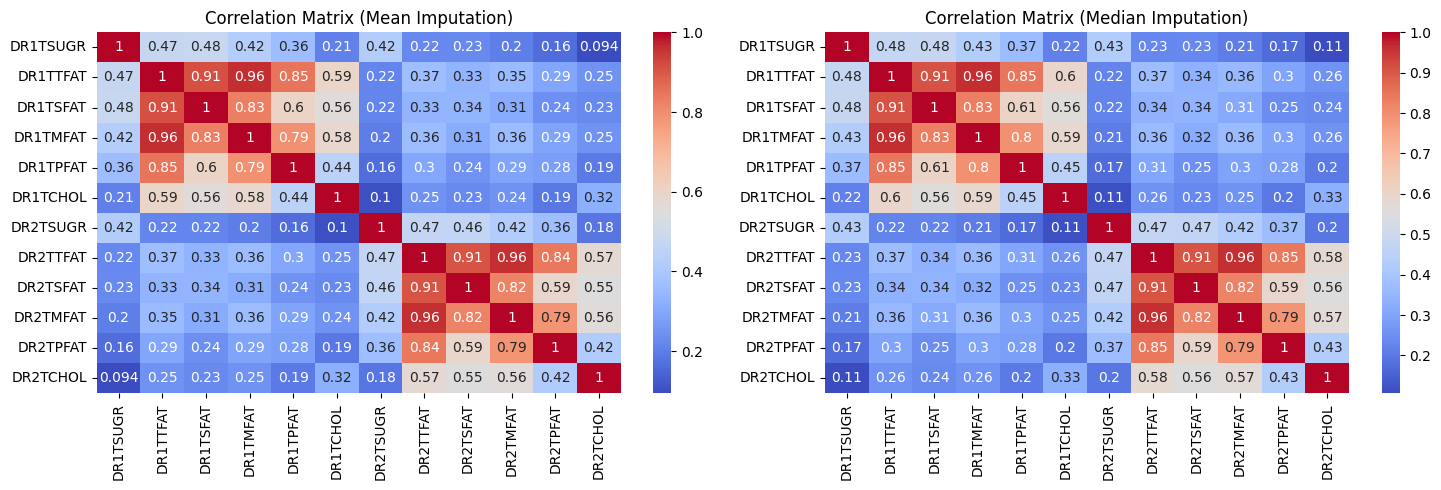

In [ ]:
# prompt: heatmap subplot dietary_data_chol_sugar_fillna_mean.corr and  dietary_data_chol_sugar_fillna_median.corr

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(dietary_data_chol_sugar_fillna_mean.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix (Mean Imputation)')

sns.heatmap(dietary_data_chol_sugar_fillna_median.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix (Median Imputation)')

plt.tight_layout()
plt.show()

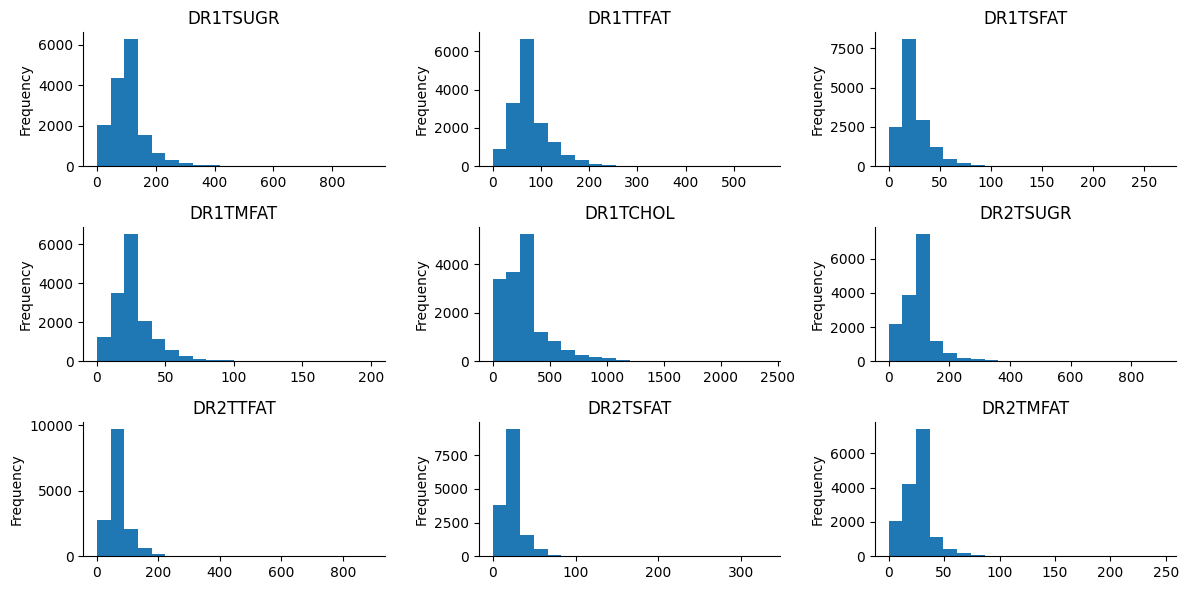

In [ ]:
#lets see some plottings for some variables
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

dietary_data_chol_sugar_fillna_mean['DR1TSUGR'].plot(kind = 'hist', title = 'DR1TSUGR',bins =20, ax = axes[0,0])
axes[0,0].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR1TTFAT'].plot(kind = 'hist', title = 'DR1TTFAT',bins =20, ax = axes[0,1])
axes[0,1].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR1TSFAT'].plot(kind = 'hist', title = 'DR1TSFAT',bins =20, ax = axes[0,2])
axes[0,2].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR1TMFAT'].plot(kind = 'hist', title = 'DR1TMFAT',bins =20, ax = axes[1,0])
axes[1,0].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR1TCHOL'].plot(kind = 'hist', title = 'DR1TCHOL',bins =20, ax = axes[1,1])
axes[1,1].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR2TSUGR'].plot(kind = 'hist', title = 'DR2TSUGR',bins =20, ax = axes[1,2])
axes[1,2].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR2TTFAT'].plot(kind = 'hist', title = 'DR2TTFAT',bins =20, ax = axes[2,0])
axes[2,0].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR2TSFAT'].plot(kind = 'hist', title = 'DR2TSFAT',bins =20, ax = axes[2,1])
axes[2,1].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_mean['DR2TMFAT'].plot(kind = 'hist', title = 'DR2TMFAT',bins =20, ax = axes[2,2])
axes[2,2].spines[['top', 'right']].set_visible(False)


plt.tight_layout()
plt.show()

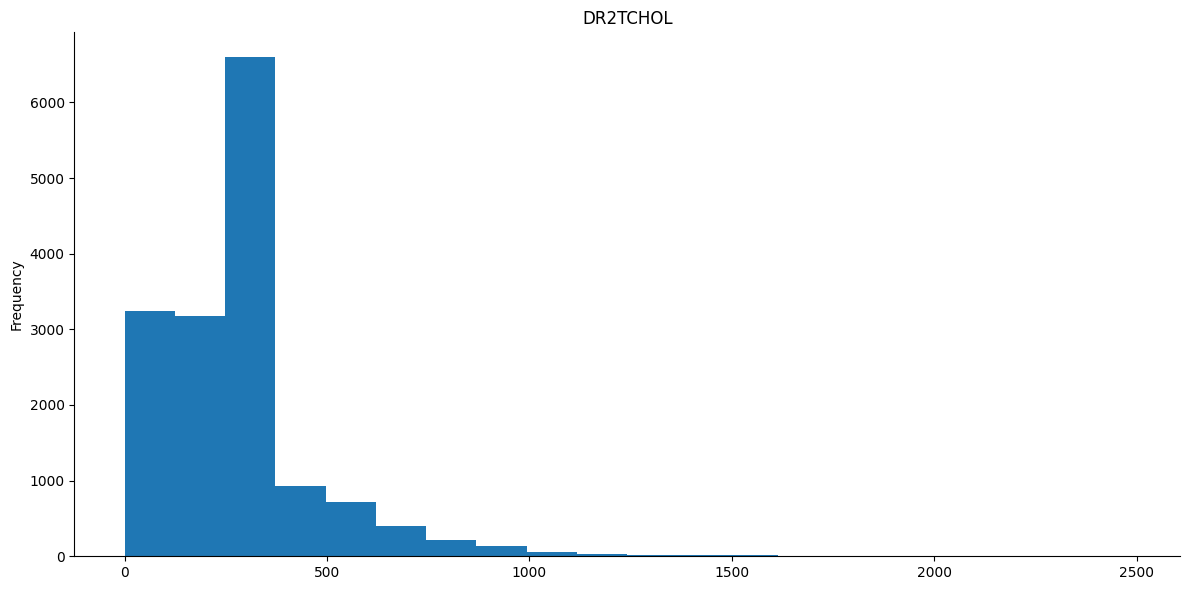

In [ ]:
figsize= (12, 6)
fig, ax = plt.subplots(figsize=figsize)
dietary_data_chol_sugar_fillna_mean['DR2TCHOL'].plot(kind = 'hist', title = 'DR2TCHOL',bins =20, ax = ax)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

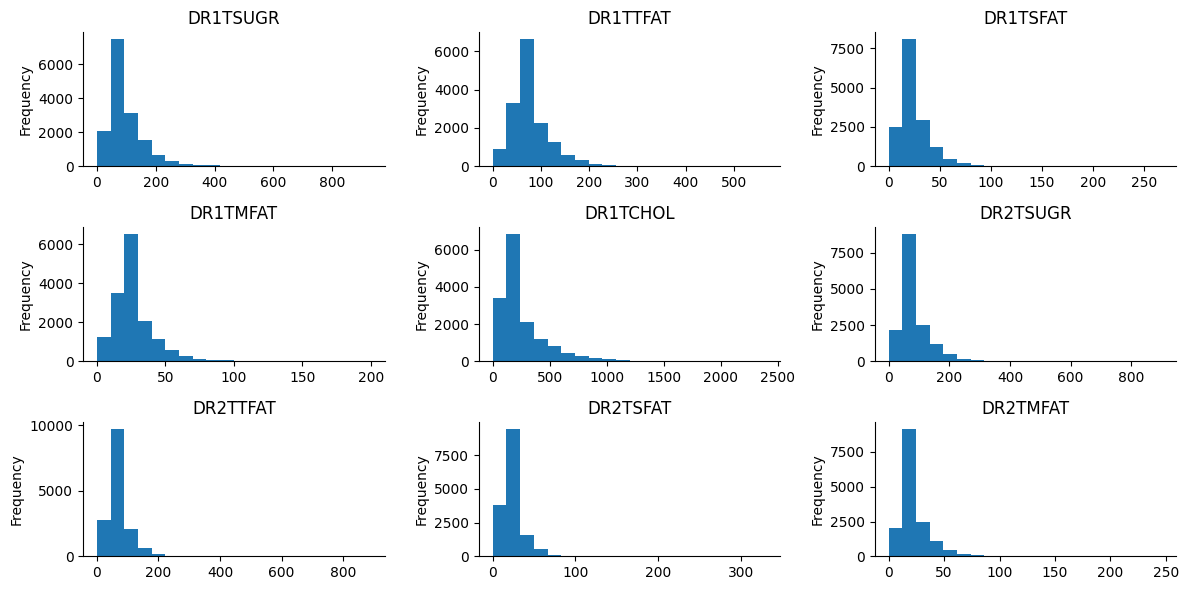

In [ ]:
#lets see some plottings for some variables
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

dietary_data_chol_sugar_fillna_median['DR1TSUGR'].plot(kind = 'hist', title = 'DR1TSUGR',bins =20, ax = axes[0,0])
axes[0,0].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR1TTFAT'].plot(kind = 'hist', title = 'DR1TTFAT',bins =20, ax = axes[0,1])
axes[0,1].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR1TSFAT'].plot(kind = 'hist', title = 'DR1TSFAT',bins =20, ax = axes[0,2])
axes[0,2].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR1TMFAT'].plot(kind = 'hist', title = 'DR1TMFAT',bins =20, ax = axes[1,0])
axes[1,0].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR1TCHOL'].plot(kind = 'hist', title = 'DR1TCHOL',bins =20, ax = axes[1,1])
axes[1,1].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR2TSUGR'].plot(kind = 'hist', title = 'DR2TSUGR',bins =20, ax = axes[1,2])
axes[1,2].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR2TTFAT'].plot(kind = 'hist', title = 'DR2TTFAT',bins =20, ax = axes[2,0])
axes[2,0].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR2TSFAT'].plot(kind = 'hist', title = 'DR2TSFAT',bins =20, ax = axes[2,1])
axes[2,1].spines[['top', 'right']].set_visible(False)

dietary_data_chol_sugar_fillna_median['DR2TMFAT'].plot(kind = 'hist', title = 'DR2TMFAT',bins =20, ax = axes[2,2])
axes[2,2].spines[['top', 'right']].set_visible(False)


plt.tight_layout()
plt.show()

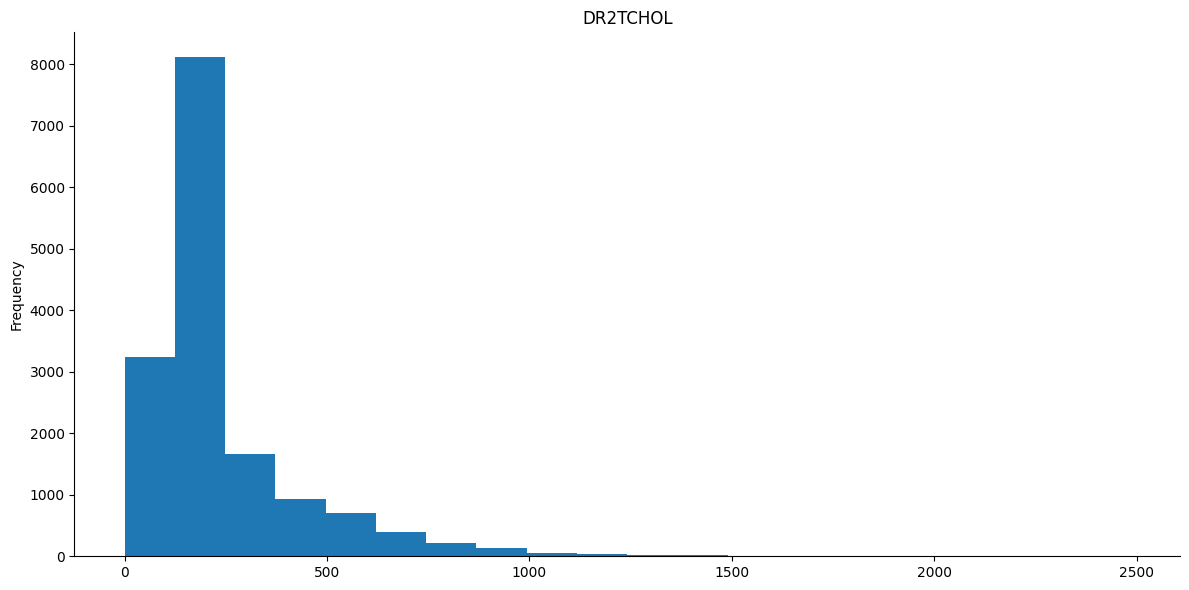

In [ ]:
figsize= (12, 6)
fig, ax = plt.subplots(figsize=figsize)
dietary_data_chol_sugar_fillna_median['DR2TCHOL'].plot(kind = 'hist', title = 'DR2TCHOL',bins =20, ax = ax)
ax.spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

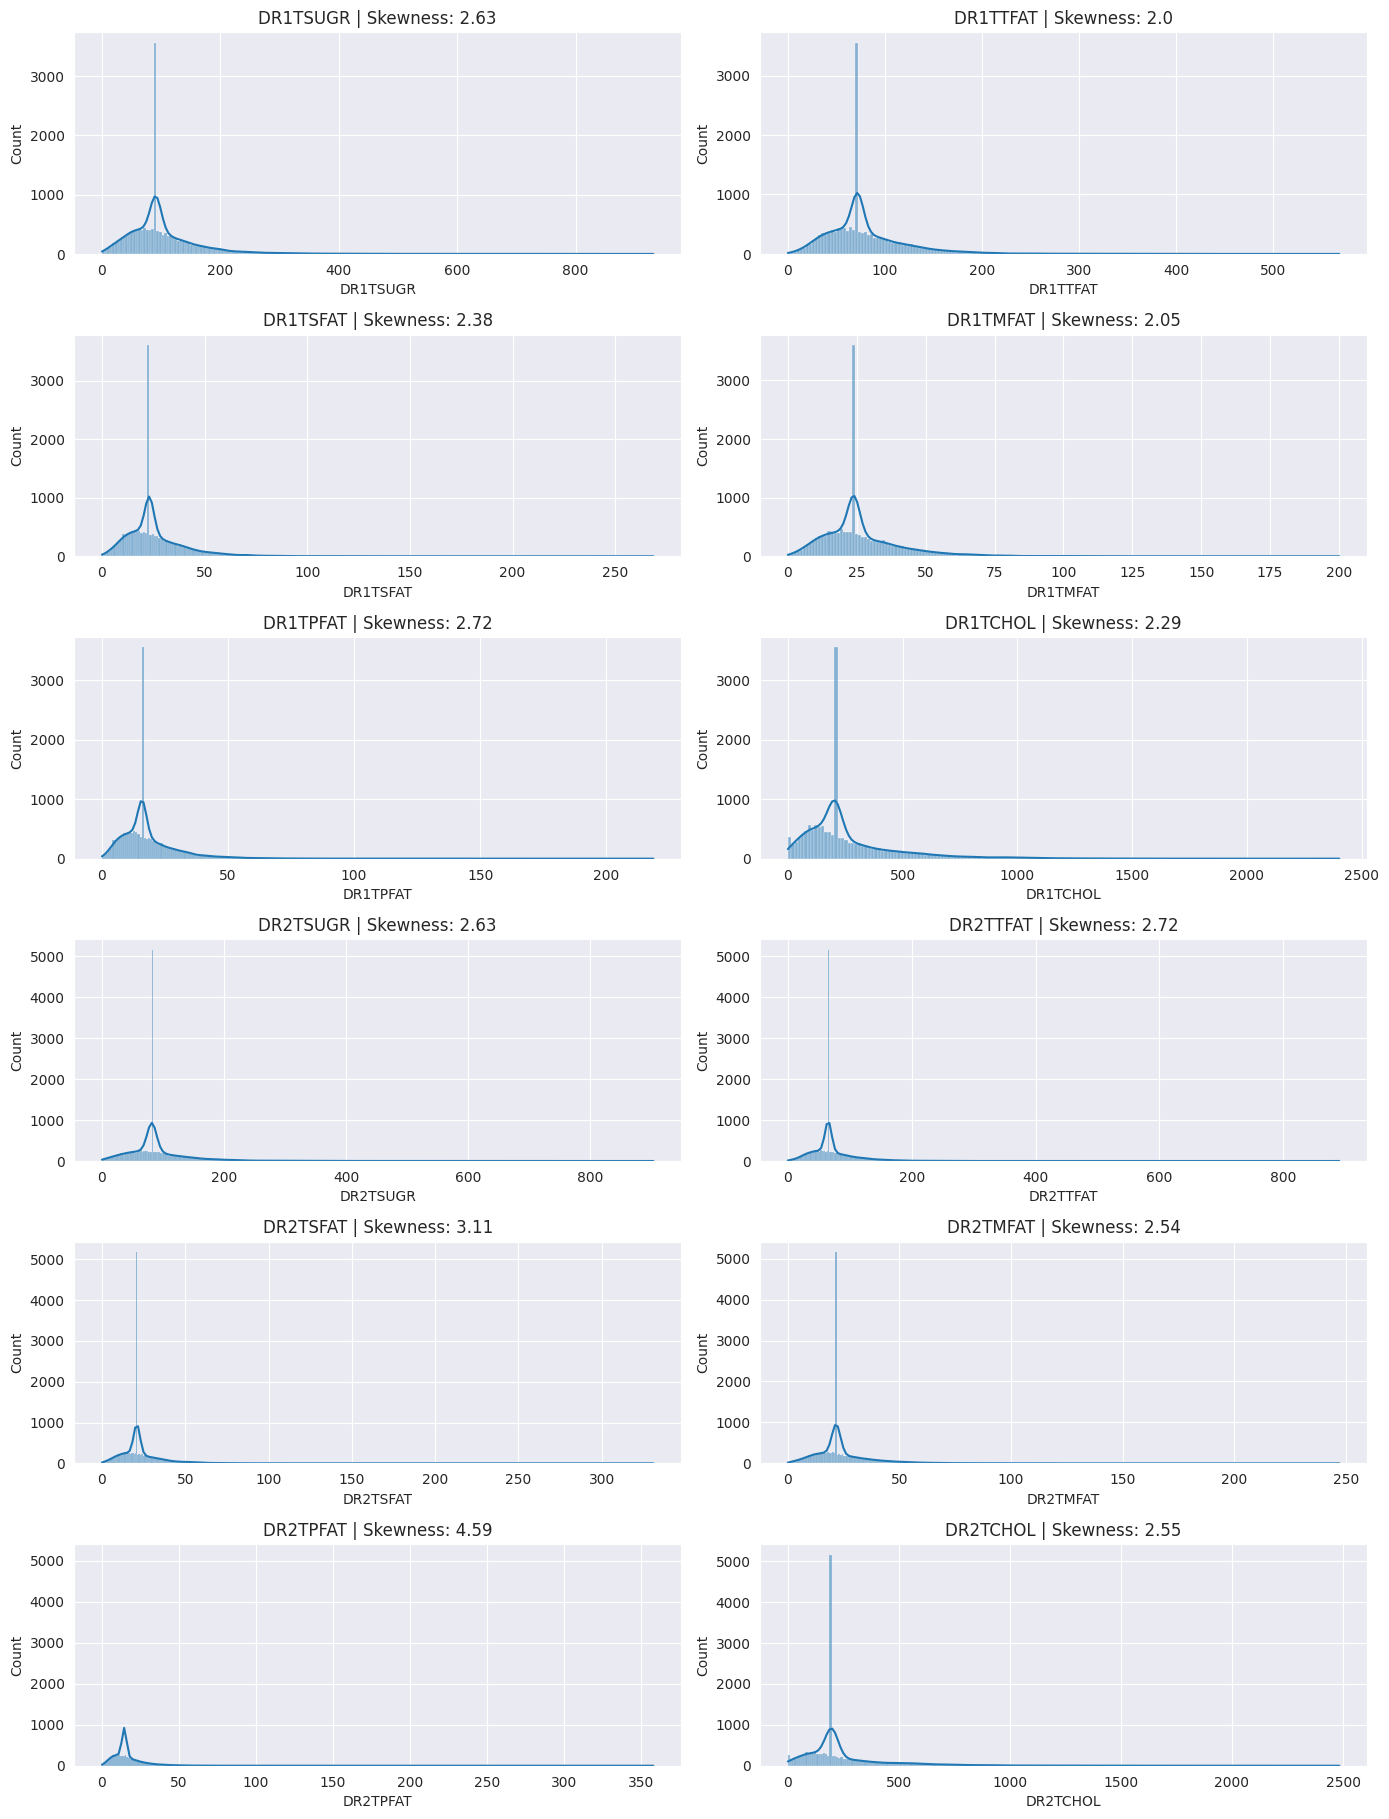

In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = dietary_data_chol_sugar_fillna_median.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(dietary_data_chol_sugar_fillna_median[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dietary_data_chol_sugar_fillna_median[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

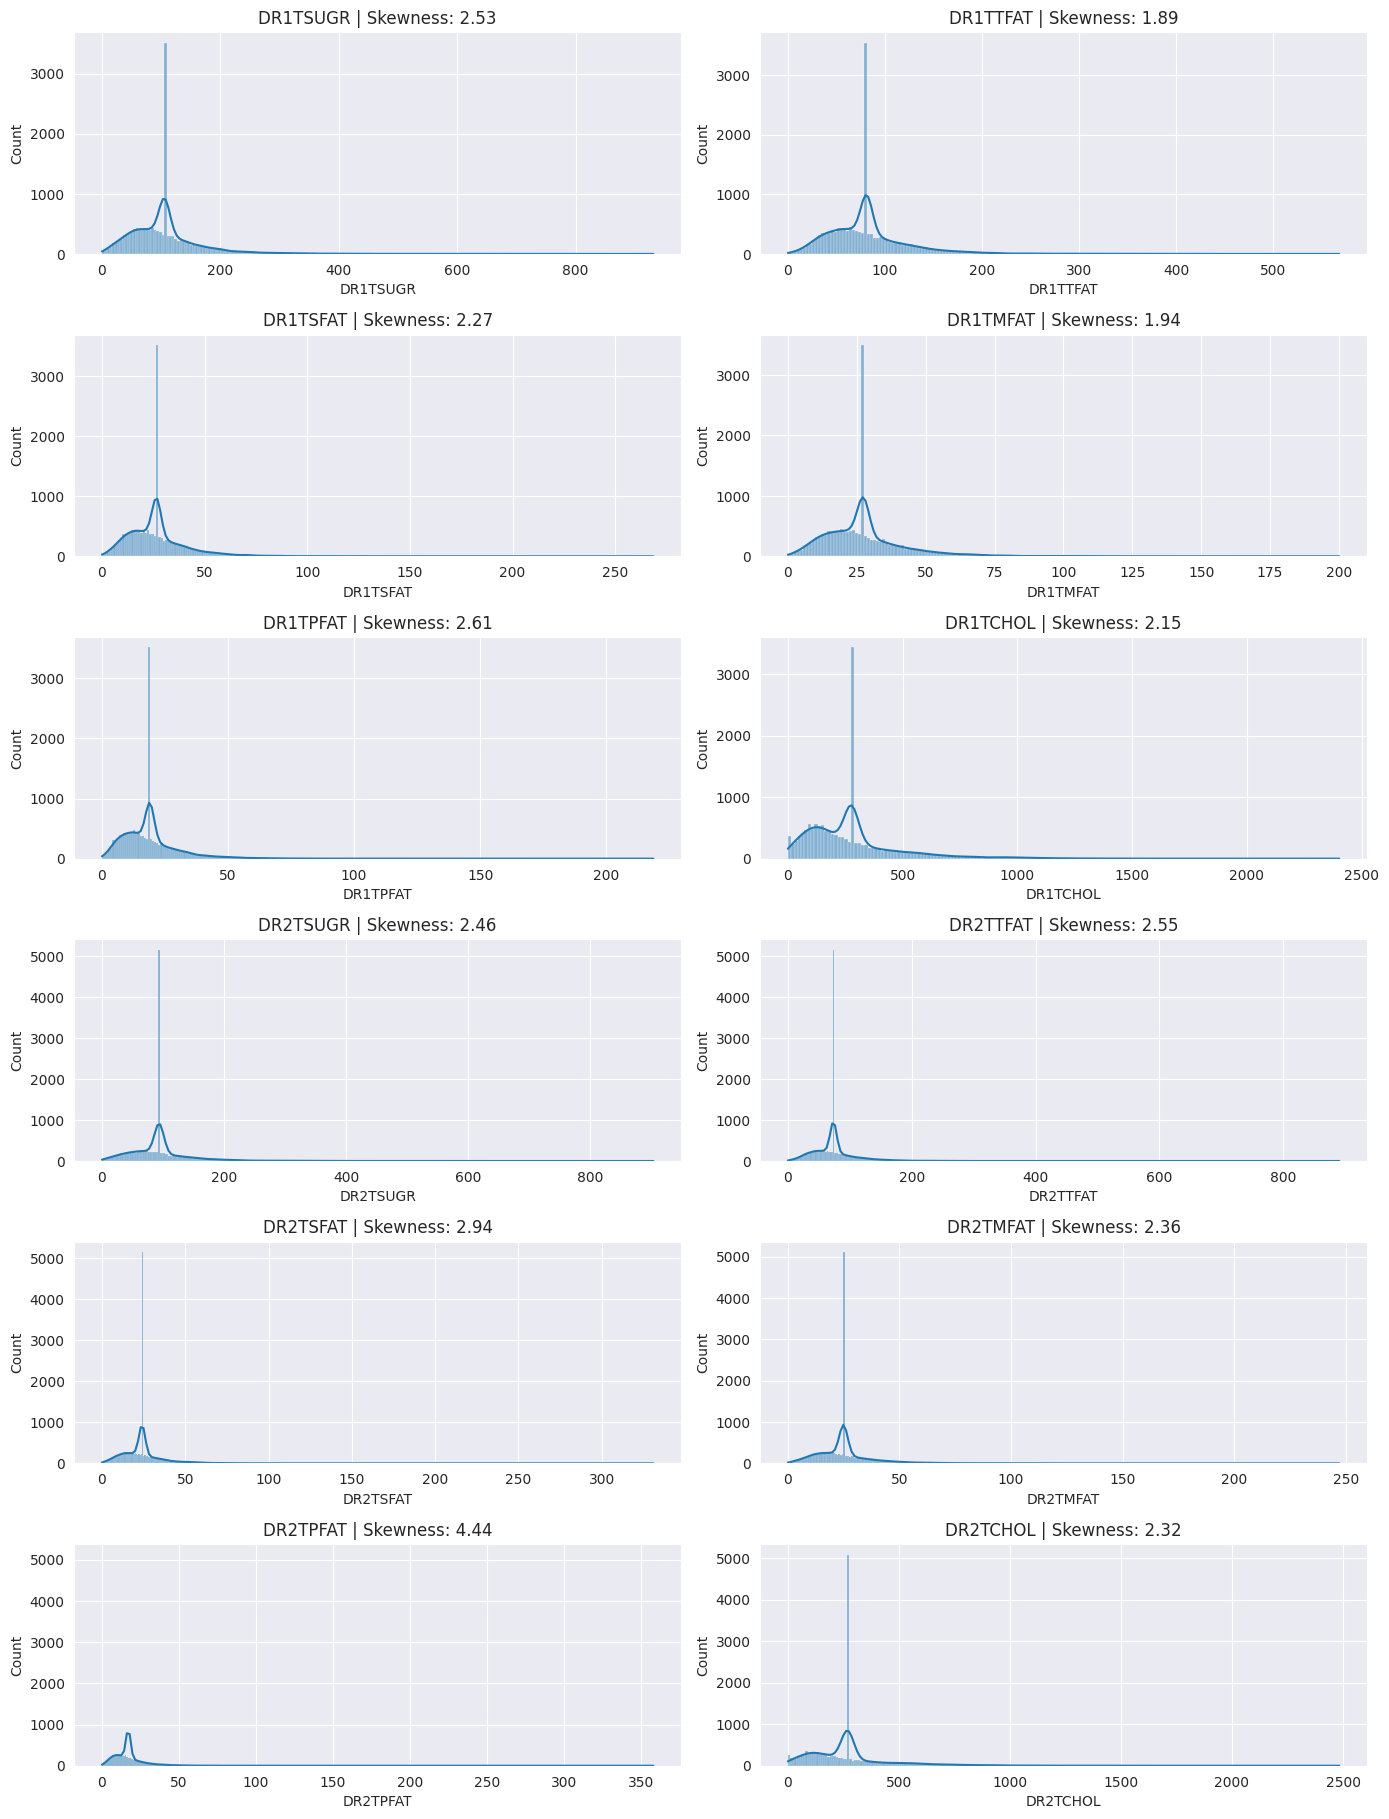

In [ ]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = dietary_data_chol_sugar_fillna_mean.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(dietary_data_chol_sugar_fillna_mean[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(dietary_data_chol_sugar_fillna_mean[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

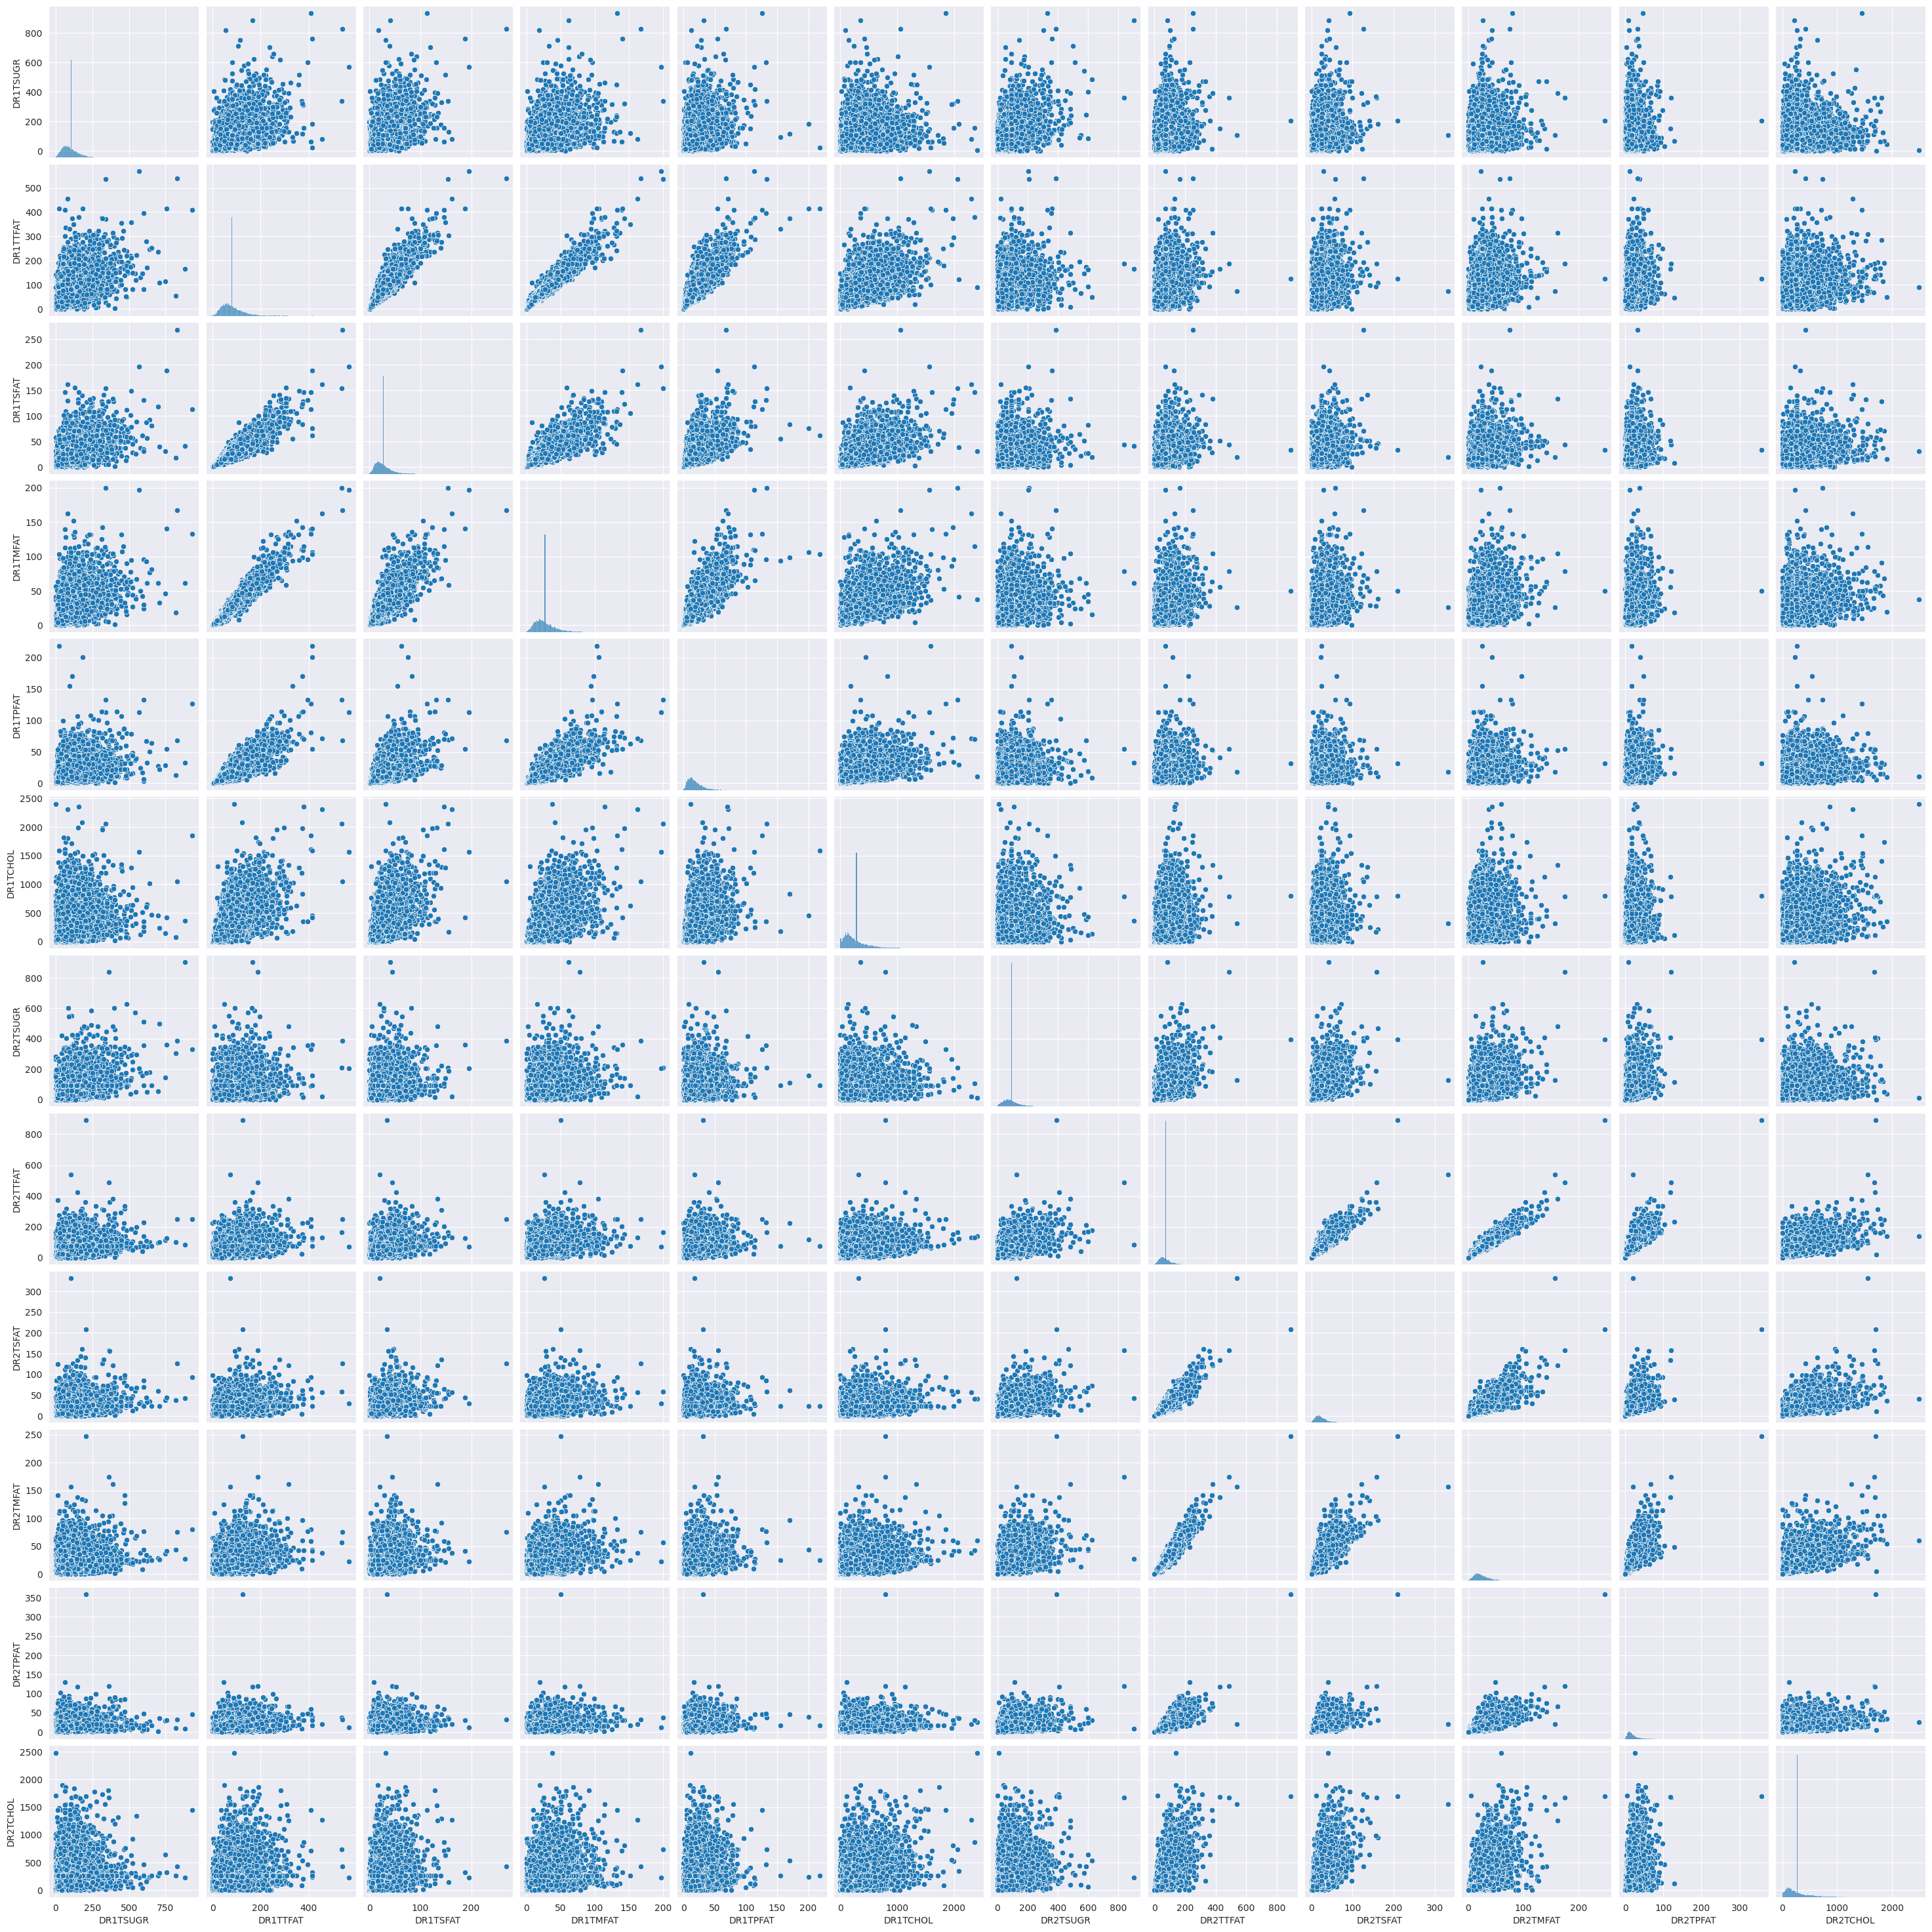

In [ ]:
sns.pairplot(dietary_data_chol_sugar_fillna_mean)

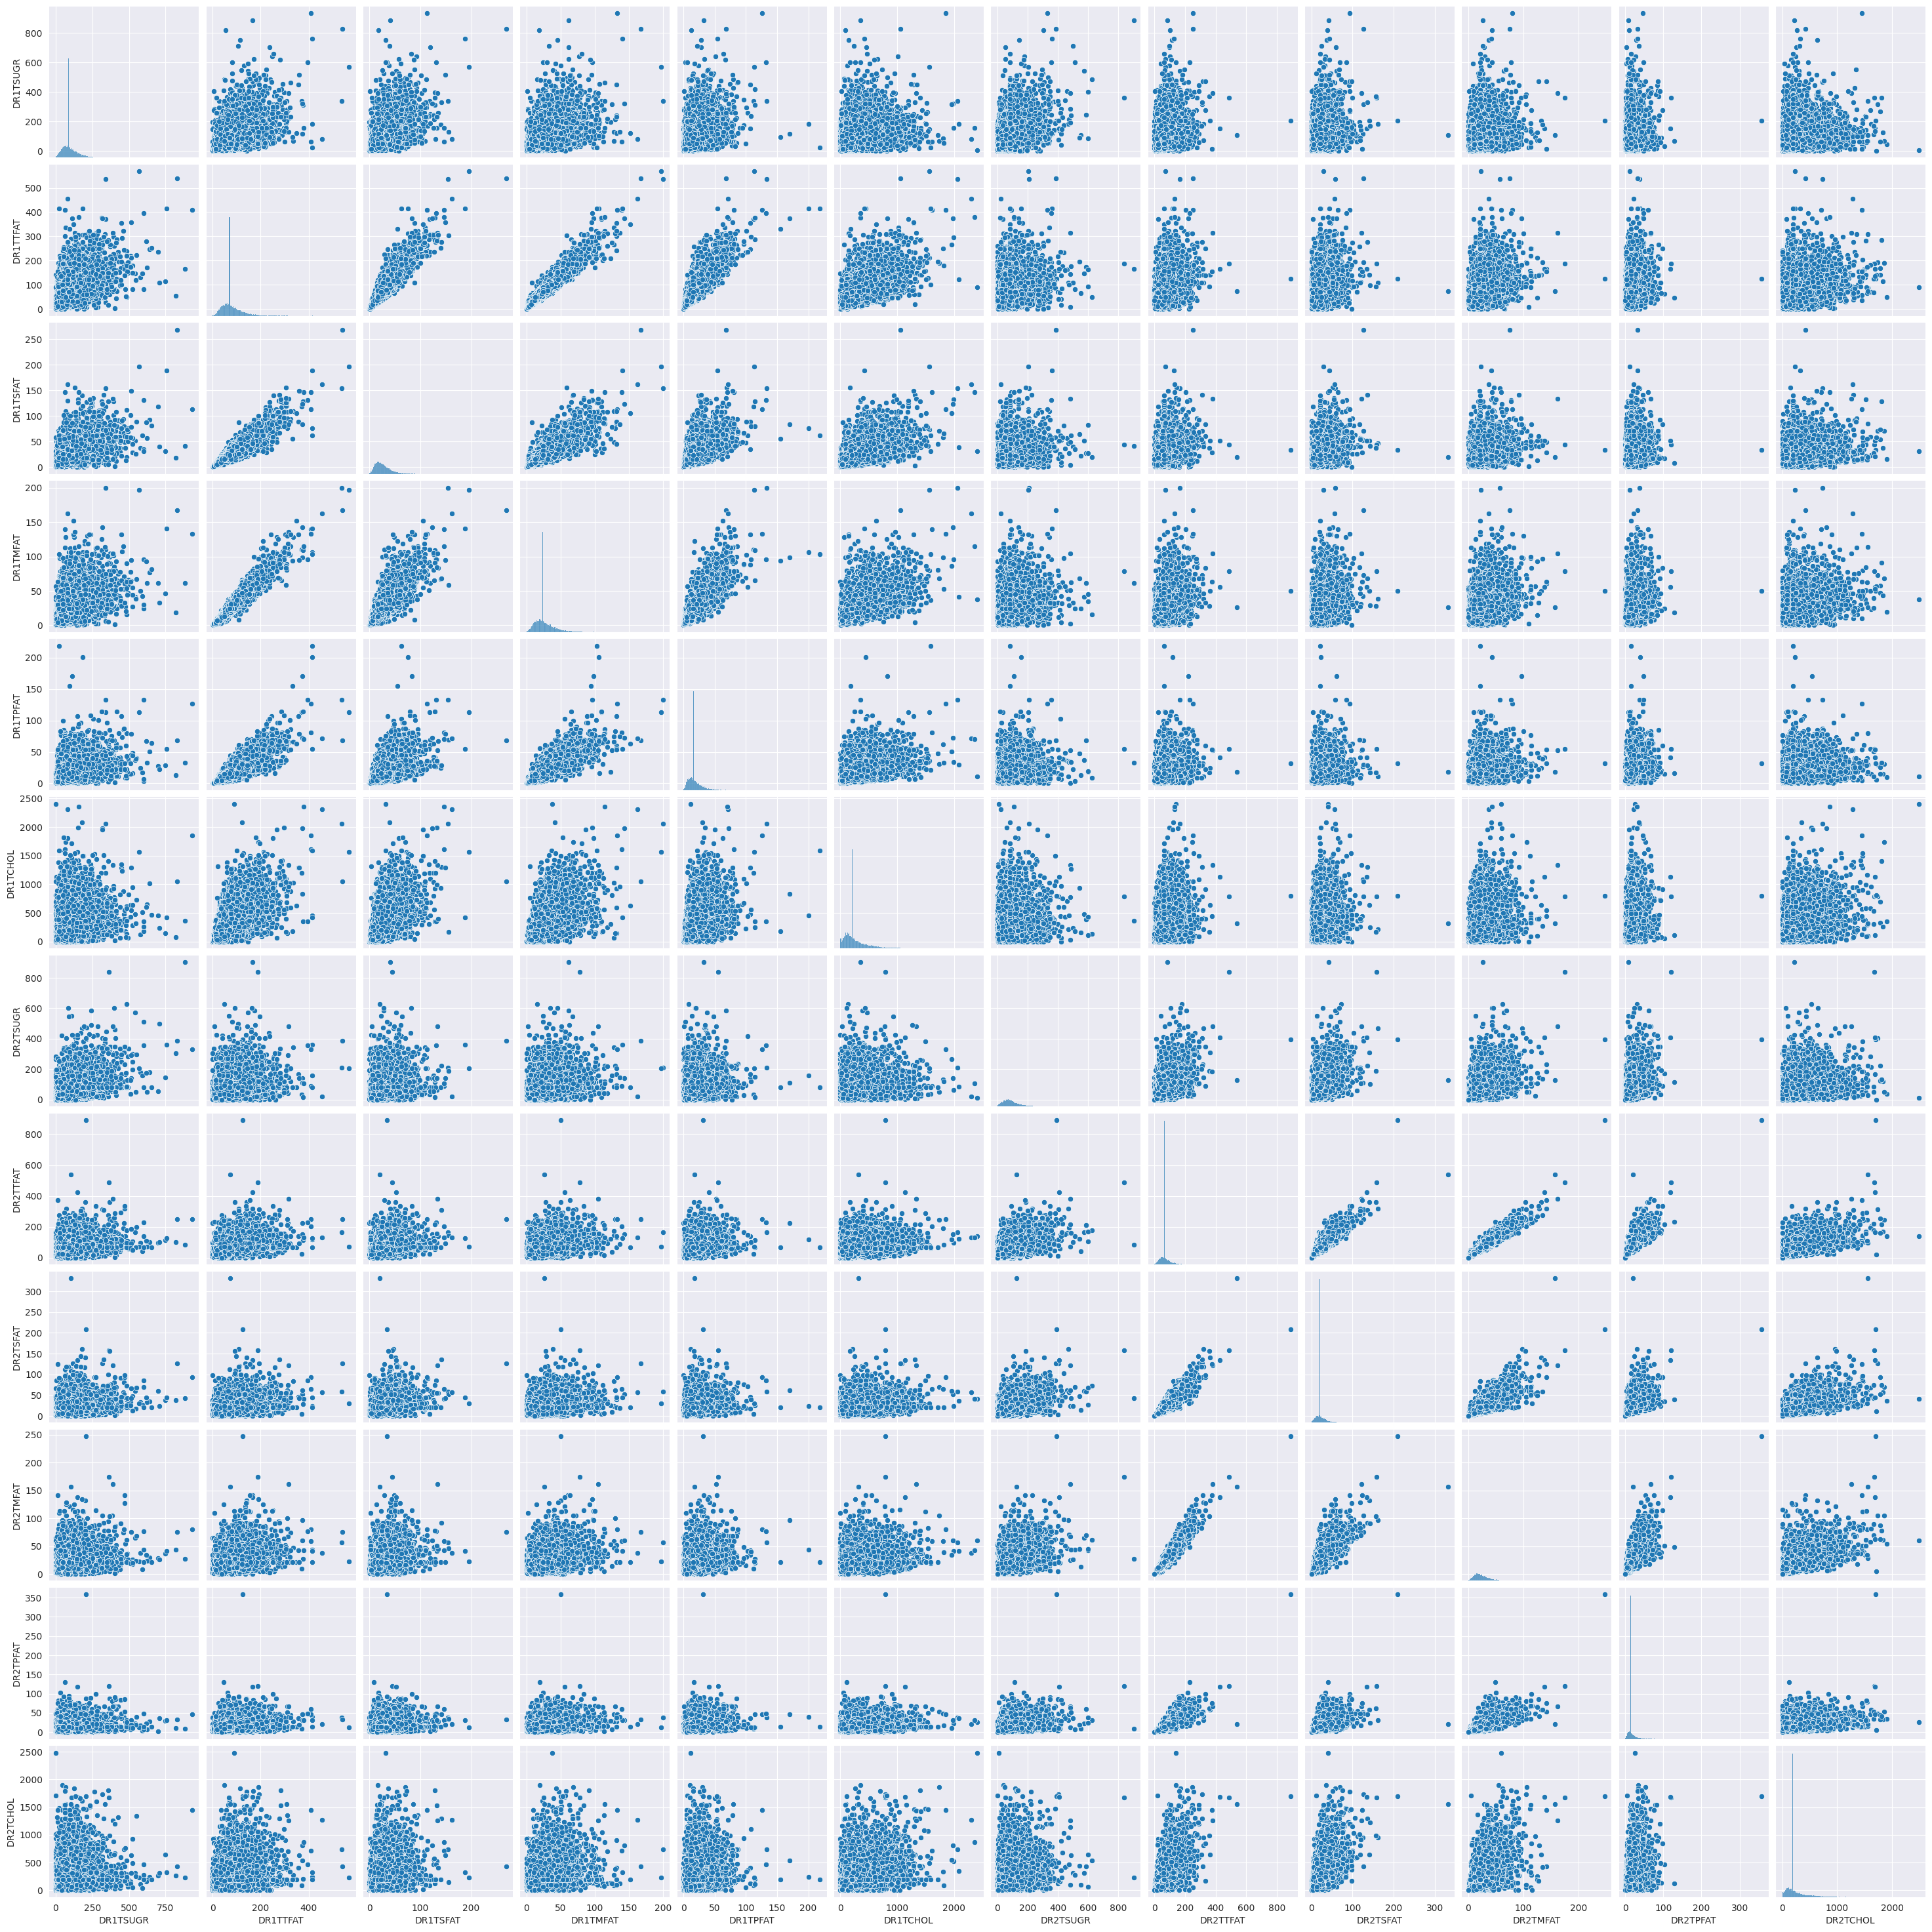

In [ ]:
sns.pairplot(dietary_data_chol_sugar_fillna_median)

##PCA AND KMEANS LABELS

In [ ]:
from sklearn.cluster import KMeans
clusters = 8

kmeans = KMeans(n_clusters = clusters)
kmeans1 = KMeans(n_clusters = clusters)
kmeans.fit(dietary_data_chol_sugar_fillna_mean)
kmeans1.fit(dietary_data_chol_sugar_fillna_median)

print(kmeans.labels_)
print(kmeans1.labels_)

[5 0 5 ... 5 3 1]
[6 0 6 ... 6 7 0]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca1 = PCA(3)
pca.fit(dietary_data_chol_sugar_fillna_mean)
pca1.fit(dietary_data_chol_sugar_fillna_median)


pca_data = pd.DataFrame(pca.transform(dietary_data_chol_sugar_fillna_mean))
pca_data1 = pd.DataFrame(pca1.transform(dietary_data_chol_sugar_fillna_median))

print(pca_data.head())
print(pca_data1.head())

            0             1             2
0 -285.657110 -2.906936e+01 -1.939897e+01
1 -147.782078  2.646403e+01 -6.070111e+01
2 -193.966484 -1.195062e+01  7.843137e+01
3 -232.550591 -4.803082e+01 -1.348436e+00
4    0.000000 -7.105427e-15  4.263256e-14
            0          1          2
0 -260.024960 -16.579730 -15.787220
1 -121.663559  37.290062 -57.665554
2 -167.811108  -0.358231  81.650380
3 -207.129140 -36.158173   2.023856
4  -76.882743  -3.795148  -8.000542


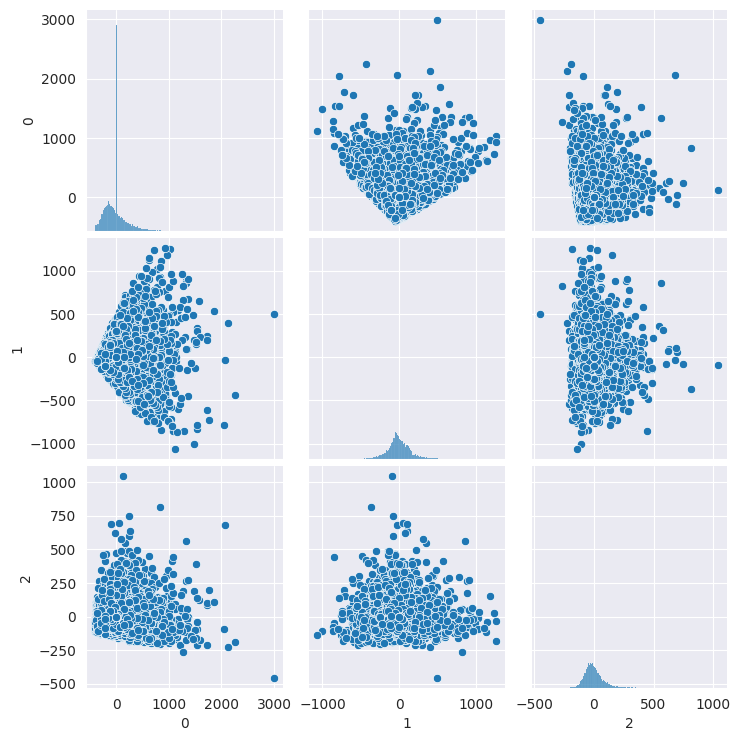

In [ ]:
sns.pairplot(pca_data)

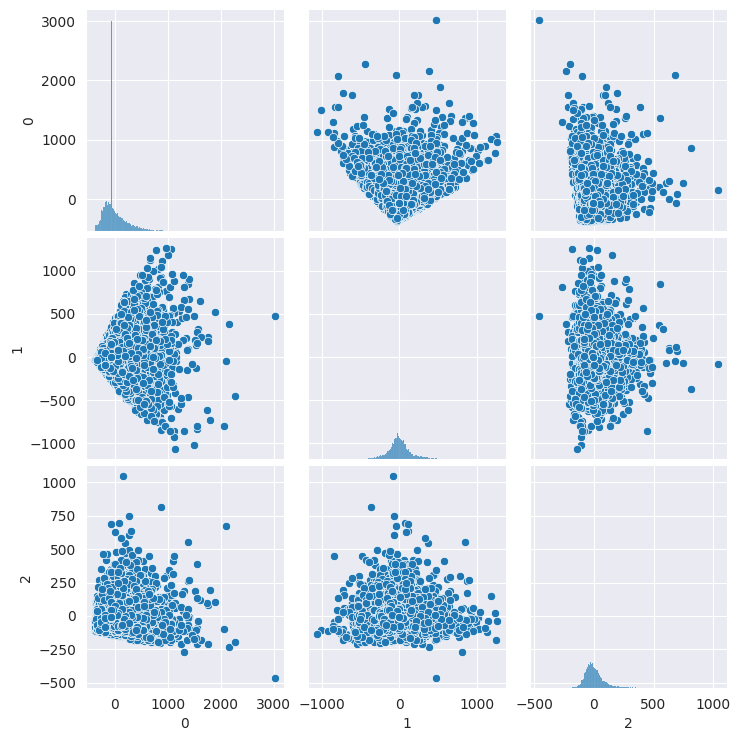

In [ ]:
sns.pairplot(pca_data1)

<Axes: xlabel='0', ylabel='1'>

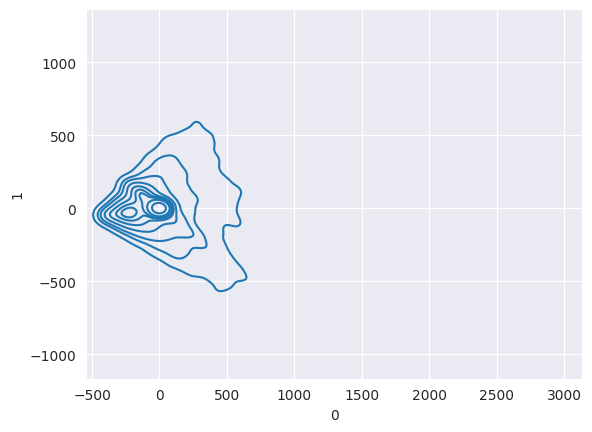

In [ ]:
sns.kdeplot(data=pca_data,x=0,y=1)

<Axes: xlabel='0', ylabel='1'>

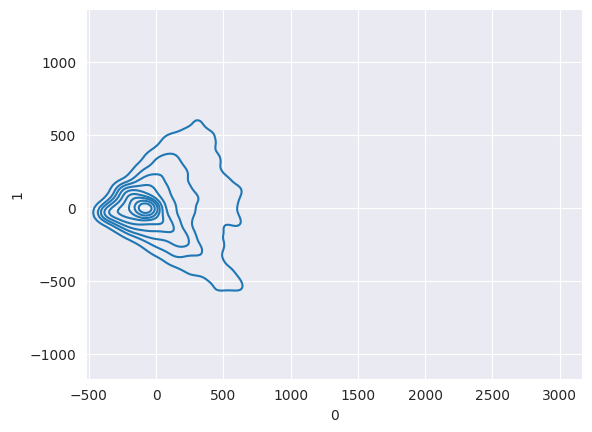

In [ ]:
sns.kdeplot(data=pca_data1,x=0,y=1)

<Axes: ylabel='Density'>

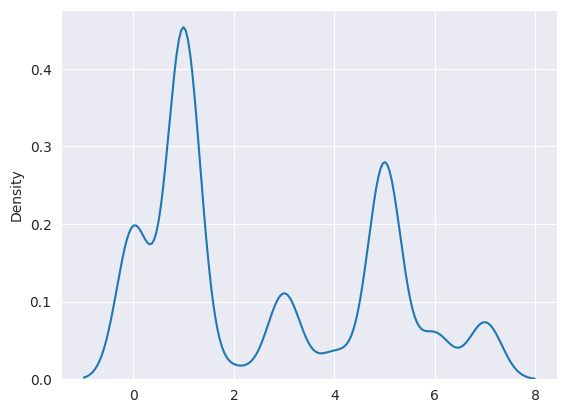

In [ ]:
sns.kdeplot(data=kmeans.labels_)

<Axes: ylabel='Density'>

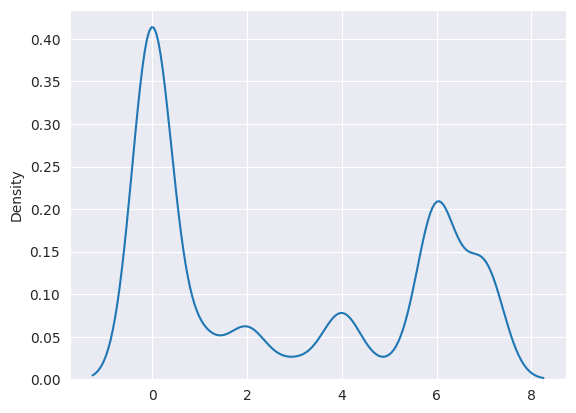

In [ ]:
sns.kdeplot(data=kmeans1.labels_)

In [ ]:
# prompt: xgboost

!pip install xgboost

In [ ]:
# prompt: xgboost model for lab_data_cholesterol fillna mean

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'dietary_data_chol_sugar_fillna_mean' is your DataFrame
# and  want to predict 'LBDLDL'

# Define features (X) and target (y)
X = dietary_data_chol_sugar_fillna_mean.drop('DR1TSUGR', axis=1)
y = dietary_data_chol_sugar_fillna_mean['DR1TSUGR']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 60.03079510716853


In [ ]:
MAE = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error (MAE): {MAE}")

Mean Absolute Error (MAE): 35.47444520514659


In [ ]:
MSE = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {MSE}")

Mean Squared Error (MSE): 3603.696361198849


In [ ]:
# prompt: all variable min max on dietary_datachol_sugar_fillna_mean
print("Min for every varible in Dietry data filled in mean:")
print(dietary_data_chol_sugar_fillna_mean.min())
print("Max for every varible in dietary data filled in mean:")
print(dietary_data_chol_sugar_fillna_mean.max())

Min for every varible in Dietry data filled in mean:
DR1TSUGR    5.397605e-79
DR1TTFAT    5.397605e-79
DR1TSFAT    5.397605e-79
DR1TMFAT    5.397605e-79
DR1TPFAT    5.397605e-79
DR1TCHOL    5.397605e-79
DR2TSUGR    5.397605e-79
DR2TTFAT    5.397605e-79
DR2TSFAT    5.397605e-79
DR2TMFAT    5.397605e-79
DR2TPFAT    5.397605e-79
DR2TCHOL    5.397605e-79
dtype: float64
Max for every varible in dietary data filled in mean:
DR1TSUGR     931.160
DR1TTFAT     567.960
DR1TSFAT     268.591
DR1TMFAT     200.097
DR1TPFAT     218.701
DR1TCHOL    2403.000
DR2TSUGR     903.200
DR2TTFAT     890.510
DR2TSFAT     331.047
DR2TMFAT     247.042
DR2TPFAT     358.034
DR2TCHOL    2483.000
dtype: float64


In [ ]:
# prompt: xgboost model for lab_data_cholesterol fillna median

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'dietary_data_chol_sugar_fillna_mean' is your DataFrame
# and  want to predict 'LBDLDL'

# Define features (X) and target (y)
X = dietary_data_chol_sugar_fillna_median.drop('DR1TSUGR', axis=1)
y = dietary_data_chol_sugar_fillna_median['DR1TSUGR']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 59.77500591873833


In [ ]:
MAE = np.mean(np.abs(y_test - y_pred))
print(f"Mean Absolute Error (MAE): {MAE}")

Mean Absolute Error (MAE): 35.47444520514659


In [ ]:
MSE = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error (MSE): {MSE}")

Mean Squared Error (MSE): 3603.696361198849


In [ ]:
# prompt: all variable min max on dietary_datachol_sugar_fillna_median
print("Min for every varible in Dietry data filled in median:")
print(dietary_data_chol_sugar_fillna_median.min())
print("Max for every varible in dietary data filled in median:")
print(dietary_data_chol_sugar_fillna_median.max())

Min for every varible in Dietry data filled in median:
DR1TSUGR    5.397605e-79
DR1TTFAT    5.397605e-79
DR1TSFAT    5.397605e-79
DR1TMFAT    5.397605e-79
DR1TPFAT    5.397605e-79
DR1TCHOL    5.397605e-79
DR2TSUGR    5.397605e-79
DR2TTFAT    5.397605e-79
DR2TSFAT    5.397605e-79
DR2TMFAT    5.397605e-79
DR2TPFAT    5.397605e-79
DR2TCHOL    5.397605e-79
dtype: float64
Max for every varible in dietary data filled in median:
DR1TSUGR     931.160
DR1TTFAT     567.960
DR1TSFAT     268.591
DR1TMFAT     200.097
DR1TPFAT     218.701
DR1TCHOL    2403.000
DR2TSUGR     903.200
DR2TTFAT     890.510
DR2TSFAT     331.047
DR2TMFAT     247.042
DR2TPFAT     358.034
DR2TCHOL    2483.000
dtype: float64


In [ ]:
dietary_data_chol_sugar_fillna_mean.to_csv('dietary_data_chol_sugar_fillna_mean.csv')
dietary_data_chol_sugar_fillna_median.to_csv('dietary_data_chol_sugar_fillna_median.csv')

In [ ]:
#We can go on the eating the fish variables as fish different ones if needed.